In [65]:
import pandas as pd

In [66]:
set1 = pd.read_csv("13_Police_killed_or_injured_on_duty.csv")


In [67]:
set1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2450 entries, 0 to 2449
Data columns (total 18 columns):
 #   Column                                             Non-Null Count  Dtype 
---  ------                                             --------------  ----- 
 0   Area_Name                                          2450 non-null   object
 1   Year                                               2450 non-null   int64 
 2   Group_Name                                         2450 non-null   object
 3   Sub_Group_Name                                     2450 non-null   object
 4   Police_Injured_By_Criminals                        2450 non-null   int64 
 5   Police_Injured_By_Riotous_Mobs                     2450 non-null   int64 
 6   Police_Injured_In_Accidents                        2450 non-null   int64 
 7   Police_Injured_In_Dacoity_OperationsOther_raids    2450 non-null   int64 
 8   Police_Injured_In_TerroristsExtremists_Operations  2450 non-null   int64 
 9   Police_Injured_On_B

In [68]:
set2 = pd.read_csv("14_Age_profile_of_police_personnel_killed_on_duty.csv")


In [69]:
set2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Area_Name         350 non-null    object
 1   Year              350 non-null    int64 
 2   Age_18_25_Yrs     350 non-null    int64 
 3   Age_25_35_Yrs     350 non-null    int64 
 4   Age_35_45_Yrs     350 non-null    int64 
 5   Age_45_55_Yrs     350 non-null    int64 
 6   Age_Above_55_Yrs  350 non-null    int64 
 7   Age_Total         350 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 22.0+ KB


In [70]:
import matplotlib.pyplot as plt
%matplotlib inline  
# #output stored within notebook

In [71]:
#getting total of each column of dataset1



pibc = set1['Police_Injured_By_Criminals'].values.sum()
pibrm = set1['Police_Injured_By_Riotous_Mobs'].values.sum()
piia = set1['Police_Injured_In_Accidents'].values.sum()
piidor = set1['Police_Injured_In_Dacoity_OperationsOther_raids'].values.sum()
piito = set1['Police_Injured_In_TerroristsExtremists_Operations'].values.sum()
piobd = set1['Police_Injured_On_Border_Duties'].values.sum()
pitp = set1['Police_Injured_Total_Policemen'].values.sum()
pkbc = set1['Police_Killed_By_Criminals'].values.sum()
pkbrm = set1['Police_Killed_By_Riotous_Mobs'].values.sum()
pkia = set1['Police_Killed_In_Accidents'].values.sum()
pkidor = set1['Police_Killed_In_Dacoity_OperationsOther_raids'].values.sum()
pkito = set1['Police_Killed_In_TerroristsExtremists_Operations'].values.sum()
pkobd = set1['Police_Killed_On_Border_Duties'].values.sum()
pktp = set1['Police_Killed_Total_Policemen'].values.sum()



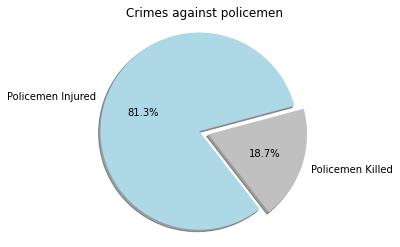

In [72]:
#Plotting Total policemen killed vs injured


Tasks = [pitp ,pktp]

my_labels = 'Policemen Injured','Policemen Killed'
my_colors = ['lightblue','silver']
my_explode = (0, 0.1)
plt.pie(Tasks, labels=my_labels, autopct='%1.1f%%', startangle=15, shadow = True, colors=my_colors, explode=my_explode)
plt.title('Crimes against policemen')
plt.axis('equal')
plt.show()


#If we see crimes against policeman, most of the crimes were injuries. (81.3%) 

In [73]:
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly import tools

In [74]:
#Plotting various reasons why were policemen injured irrespective of states
Tasks = [pibc, pibrm, piia, piidor, piito,piobd]

my_labels = 'Criminals','Riotous Mobs', 'Accidents', 'Operations Other raids', 'Terrorists Extremists Operations', 'Border Duties'
sources_pie = go.Pie(labels=my_labels, values=Tasks, marker=dict(
                                                    line=dict(color='#FFF', width=2)), 
                                                            domain={'x': [0.0, .4], 'y': [0.0, 1]}
                                                            , showlegend=False, name='Sources of Pie', textinfo='label+percent')
layout = go.Layout(height = 600,
                   width = 1000,
                   autosize = False,
                   title = 'Reasons of Injuries of ploicemen')
fig = go.Figure(data = [sources_pie], layout = layout)
fig.show()

#Most of the injuries were caused by riotous mobs, about 52.6% of total. There were 12k+ cases of injuries caused through criminals

In [75]:
#Plotting various reasons of killings of policemen
Tasks2 = [pkbc, pkbrm, pkia, pkidor, pkito,pkobd]

my_labels2 = 'Criminals','Riotous Mobs', 'Accidents', 'Operations Other raids', 'Terrorists Extremists Operations', 'Border Duties'
sources_pie = go.Pie(labels=my_labels2, values=Tasks2, marker=dict(
                                                    line=dict(color='#FFF', width=2)), 
                                                            domain={'x': [0.0, .4], 'y': [0.0, 1]}
                                                            , showlegend=False, name='Sources of Pie', textinfo='label+percent')
layout = go.Layout(height = 600,
                   width = 1000,
                   autosize = False,
                   title = 'Reasons of Killing of ploicemen')
fig = go.Figure(data = [sources_pie], layout = layout)
fig.show()


#About 19.8% policemen were killed through terrorist and extremists operations

In [76]:
import plotly.express as px

named_colorscales = px.colors.named_colorscales()
fig = px.bar(set1, x="Area_Name", y="Police_Injured_Total_Policemen", title="Police injured", height=2000,hover_data=['Year']
)
fig.show()

#Maharashtra is having highest number of injuries.

In [77]:
year = set1['Year'].values
vals = set1['Police_Injured_Total_Policemen'].values
groupname = list(set(set1['Group_Name'].values))
# print(groupname)

gn = set1['Group_Name'].values
fvals =[]
states = set1['Area_Name'].values
fstates = []
for i in range(len(vals)):
    if ((year[i] == 2010) and (gn[i] == 'Police - Constables')):
       
        fvals.append(vals[i])
        fstates.append(states[i])
named_colorscales = px.colors.named_colorscales()
fig = px.bar(set1, x=fstates, y=fvals, title="Police - Constables injured in year 2010",height=600,color= named_colorscales[:len(fvals)])
fig.update_layout(xaxis_title="States",
    yaxis_title="Number of Policeman Injured")
fig.update_layout(showlegend=False)
fig.show()


#Most of the constables killed were from Jammu And Kashmir

In [78]:
year = set1['Year'].values
vals = set1['Police_Injured_Total_Policemen'].values
groupname = list(set(set1['Group_Name'].values))
# print(groupname)

gn = set1['Group_Name'].values
fvals =[]
states = set1['Area_Name'].values
fstates = []
for i in range(len(vals)):
    if ((year[i] == 2010) and (gn[i] == 'Police - Sub-Inspectors')):
        
        fvals.append(vals[i])
        fstates.append(states[i])
named_colorscales = px.colors.named_colorscales()
fig = px.bar(set1, x=fstates, y=fvals, title="Police - Sub-Inspectors injured in year 2010",height = 600 ,color= named_colorscales[:len(fvals)])
fig.update_layout(xaxis_title="States",
    yaxis_title="Number of Policeman Injured")
fig.update_layout(showlegend=False)
fig.show()


#Sub Inspectors were injured mostly in Jammu & Kashmir and Kerela

In [79]:
year = set1['Year'].values
vals = set1['Police_Injured_Total_Policemen'].values
groupname = list(set(set1['Group_Name'].values))
# print(groupname)

gn = set1['Group_Name'].values
fvals =[]
states = set1['Area_Name'].values
fstates = []
for i in range(len(vals)):
    if ((year[i] == 2010) and (gn[i] == 'Police - Assistant Sub-Inspectors')):
        fvals.append(vals[i])
        fstates.append(states[i])
named_colorscales = px.colors.named_colorscales()
fig = px.bar(set1, x=fstates, y=fvals, title="Police - Assistant Sub-Inspectors injured in year 2010",height=600 ,color= named_colorscales[:len(fvals)])
fig.update_layout(xaxis_title="States",
    yaxis_title="Number of Policeman Injured")
fig.update_layout(showlegend=False)
fig.show()

#Sub Inspectors were highly injured in West bengal, Kerela and Jammu & Kashmir

In [80]:
year = set1['Year'].values
vals = set1['Police_Injured_Total_Policemen'].values
groupname = list(set(set1['Group_Name'].values))
# print(groupname)
gn = set1['Group_Name'].values
fvals =[]
states = set1['Area_Name'].values
fstates = []
for i in range(len(vals)):
    if ((year[i] == 2010) and (gn[i] == 'Police - Inspectors')):
        fvals.append(vals[i])
        fstates.append(states[i])
named_colorscales = px.colors.named_colorscales()
fig = px.bar(set1, x=fstates, y=fvals, title="Police - Inspectors injured in year 2010",height=600 ,color= named_colorscales[:len(fvals)])
fig.update_layout(xaxis_title="States",
    yaxis_title="Number of Policeman Injured")
fig.update_layout(showlegend=False)
fig.show()

# A high number of Inspectors were Injured in Jammu and Kashmir in Year 2010

In [81]:
year = set1['Year'].values
vals = set1['Police_Injured_Total_Policemen'].values
groupname = list(set(set1['Group_Name'].values))
# print(groupname)
gn = set1['Group_Name'].values
fvals =[]
states = set1['Area_Name'].values
fstates = []
for i in range(len(vals)):
    if ((year[i] == 2010) and (gn[i] == 'Police - Head Constables')):
        fvals.append(vals[i])
        fstates.append(states[i])
named_colorscales = px.colors.named_colorscales()
fig = px.bar(set1, x=fstates, y=fvals, title="Police - Head Constables injured in year 2010",height=600 ,color= named_colorscales[:len(fvals)])
fig.update_layout(xaxis_title="States",
    yaxis_title="Number of Policeman Injured")
fig.update_layout(showlegend=False)
fig.show()


#There were 12 states with no Head Constables injured in 2010

In [82]:
year = set1['Year'].values
vals = set1['Police_Injured_Total_Policemen'].values
groupname = list(set(set1['Group_Name'].values))
# print(groupname)
gn = set1['Group_Name'].values
fvals =[]
states = set1['Area_Name'].values
fstates = []
for i in range(len(vals)):
    if ((year[i] == 2010) and (gn[i] == 'Police - Total')):
        fvals.append(vals[i])
        fstates.append(states[i])

named_colorscales = px.colors.named_colorscales()
# print(named_colorscales[:len(fvals)])

fig = px.bar(set1, x=fstates, y=fvals, title="Police - Total injured in year 2010",height=600,color= named_colorscales[:len(fvals)],

)
fig.update_layout(xaxis_title="States",
    yaxis_title="Number of Policeman Injured")

fig.update_layout(showlegend=False)


fig.show()


#There were 7 states with no injuries reported against Police officers. Highest Injuries were reported in Jammu in Kashmir. (For Year 2010)

In [83]:
import plotly.express as px

named_colorscales = px.colors.named_colorscales()
fig = px.bar(set1, x="Area_Name", y="Police_Killed_Total_Policemen", title="Police Killed", height=2000,hover_data=['Year']
)
fig.show()

# For a decade 2001-2010, State with highest number of policeman killed was Uttar Pradesh.

In [84]:
year = set1['Year'].values
vals = set1['Police_Killed_Total_Policemen'].values
groupname = list(set(set1['Group_Name'].values))
# print(groupname)
gn = set1['Group_Name'].values
fvals =[]
states = set1['Area_Name'].values
fstates = []
for i in range(len(vals)):
    if ((year[i] == 2010) and (gn[i] == 'Police - Constables')):
        fvals.append(vals[i])
        fstates.append(states[i])

named_colorscales = px.colors.named_colorscales()
# print(named_colorscales[:len(fvals)])

fig = px.bar(set1, x=fstates, y=fvals, title="Police - Constables killed in year 2010",height=600,color= named_colorscales[:len(fvals)],

)
fig.update_layout(xaxis_title="States",
    yaxis_title="Number of Policeman killed")

fig.update_layout(showlegend=False)


fig.show()


#Uttar Pradesh was the state where highest number of Constables were killed in 2010.

In [85]:
year = set1['Year'].values
vals = set1['Police_Killed_Total_Policemen'].values
groupname = list(set(set1['Group_Name'].values))
# print(groupname)
gn = set1['Group_Name'].values
fvals =[]
states = set1['Area_Name'].values
fstates = []
for i in range(len(vals)):
    if ((year[i] == 2010) and (gn[i] == 'Police - Sub-Inspectors')):
        fvals.append(vals[i])
        fstates.append(states[i])

named_colorscales = px.colors.named_colorscales()
# print(named_colorscales[:len(fvals)])

fig = px.bar(set1, x=fstates, y=fvals, title="Police - Sub-Inspectors killed in year 2010",height=600,color= named_colorscales[:len(fvals)],

)
fig.update_layout(xaxis_title="States",
    yaxis_title="Number of Policeman killed")

fig.update_layout(showlegend=False)


fig.show()




In [86]:
year = set1['Year'].values
vals = set1['Police_Killed_Total_Policemen'].values
groupname = list(set(set1['Group_Name'].values))
# print(groupname)
gn = set1['Group_Name'].values
fvals =[]
states = set1['Area_Name'].values
fstates = []
for i in range(len(vals)):
    if ((year[i] == 2010) and (gn[i] == 'Police - Assistant Sub-Inspectors')):
        fvals.append(vals[i])
        fstates.append(states[i])

named_colorscales = px.colors.named_colorscales()
# print(named_colorscales[:len(fvals)])

fig = px.bar(set1, x=fstates, y=fvals, title="Police - Assistant Sub-Inspectors killed in year 2010",height=600,color= named_colorscales[:len(fvals)],

)
fig.update_layout(xaxis_title="States",
    yaxis_title="Number of Policeman killed")

fig.update_layout(showlegend=False)


fig.show()


#Gujarat and Maharashtra were the states where highest number of sub inspectors were killed in 2010.

In [87]:
year = set1['Year'].values
vals = set1['Police_Killed_Total_Policemen'].values
groupname = list(set(set1['Group_Name'].values))
# print(groupname)
gn = set1['Group_Name'].values
fvals =[]
states = set1['Area_Name'].values
fstates = []
for i in range(len(vals)):
    if ((year[i] == 2010) and (gn[i] == 'Police - Inspectors')):
        fvals.append(vals[i])
        fstates.append(states[i])

named_colorscales = px.colors.named_colorscales()
# print(named_colorscales[:len(fvals)])

fig = px.bar(set1, x=fstates, y=fvals, title="Police - Inspectors killed in year 2010",height=600,color= named_colorscales[:len(fvals)],

)
fig.update_layout(xaxis_title="States",
    yaxis_title="Number of Policeman killed")

fig.update_layout(showlegend=False)


fig.show()


#Highest number of Inspectors were killed in Maharshtra.

In [88]:
year = set1['Year'].values
vals = set1['Police_Killed_Total_Policemen'].values
groupname = list(set(set1['Group_Name'].values))
# print(groupname)
gn = set1['Group_Name'].values
fvals =[]
states = set1['Area_Name'].values
fstates = []
for i in range(len(vals)):
    if ((year[i] == 2010) and (gn[i] == 'Police - Head Constables')):
        fvals.append(vals[i])
        fstates.append(states[i])

named_colorscales = px.colors.named_colorscales()
# print(named_colorscales[:len(fvals)])

fig = px.bar(set1, x=fstates, y=fvals, title="Police - Head Constables killed in year 2010",height=600,color= named_colorscales[:len(fvals)],

)
fig.update_layout(xaxis_title="States",
    yaxis_title="Number of Policeman killed")

fig.update_layout(showlegend=False)


fig.show()


#Gujarat, chattisgarh, Maharashtra and Tamil Nadu were the states where high number of Head Constables were killed in 2010.

In [89]:
year = set1['Year'].values
vals = set1['Police_Killed_Total_Policemen'].values
groupname = list(set(set1['Group_Name'].values))
# print(groupname)
gn = set1['Group_Name'].values
fvals =[]
states = set1['Area_Name'].values
fstates = []
for i in range(len(vals)):
    if ((year[i] == 2010) and (gn[i] == 'Police - Total')):
        fvals.append(vals[i])
        fstates.append(states[i])

named_colorscales = px.colors.named_colorscales()
# print(named_colorscales[:len(fvals)])

fig = px.bar(set1, x=fstates, y=fvals, title="Total Police killed in year 2010",height=600,color= named_colorscales[:len(fvals)],

)
fig.update_layout(xaxis_title="States",
    yaxis_title="Number of Policeman killed")

fig.update_layout(showlegend=False)


fig.show()


#There were 8 states where now Police Officers were killed in 2010. State where high number of officers were killed were Chattisgarh, Maharashtra, Punjab and Uttar Pradesh.

In [90]:
set2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Area_Name         350 non-null    object
 1   Year              350 non-null    int64 
 2   Age_18_25_Yrs     350 non-null    int64 
 3   Age_25_35_Yrs     350 non-null    int64 
 4   Age_35_45_Yrs     350 non-null    int64 
 5   Age_45_55_Yrs     350 non-null    int64 
 6   Age_Above_55_Yrs  350 non-null    int64 
 7   Age_Total         350 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 22.0+ KB


In [91]:
year = set2['Year'].values
vals = set2['Age_18_25_Yrs'].values
total1825 = 0

fvals =[]
states = set2['Area_Name'].values
fstates = []
for i in range(len(vals)):
    if(year[i] == 2010):
        total1825 += vals[i]
        fvals.append(vals[i])
        fstates.append(states[i])


fig = px.bar(set1, x=fstates, y=fvals, title="Total Police killed in year 2010(Age 18-25)",height=600,color= named_colorscales[:len(fvals)],

)
fig.update_layout(xaxis_title="States",
    yaxis_title="Number of Policeman killed")

fig.update_layout(showlegend=False)


fig.show()

#Chattisgarh reported Highest deaths of Police man of age 18-25 with Rajasthan being second in the list.


In [92]:
year = set2['Year'].values
vals = set2['Age_25_35_Yrs'].values
total2535 = 0
fvals =[]
states = set2['Area_Name'].values
fstates = []
for i in range(len(vals)):
    if(year[i] == 2010):
        total2535 += vals[i]
        fvals.append(vals[i])
        fstates.append(states[i])


fig = px.bar(set1, x=fstates, y=fvals, title="Total Police killed in year 2010(Age 25-35)",height=600,color= named_colorscales[:len(fvals)],

)
fig.update_layout(xaxis_title="States",
    yaxis_title="Number of Policeman killed")

fig.update_layout(showlegend=False)


fig.show()

#A step curve in case of policeman of age 25-35. Going down from chattisgarh to manipur.


In [93]:
year = set2['Year'].values
vals = set2['Age_35_45_Yrs'].values
total3545 = 0
fvals =[]
states = set2['Area_Name'].values
fstates = []
for i in range(len(vals)):
    if(year[i] == 2010):
        total3545 += vals[i]
        fvals.append(vals[i])
        fstates.append(states[i])


fig = px.bar(set1, x=fstates, y=fvals, title="Total Police killed in year 2010(Age 35-45)",height=600,color= named_colorscales[:len(fvals)],

)
fig.update_layout(xaxis_title="States",
    yaxis_title="Number of Policeman killed")

fig.update_layout(showlegend=False)


fig.show()

#For Age 35-45 highest number of policeman were killed in punjab.

In [94]:
year = set2['Year'].values
vals = set2['Age_45_55_Yrs'].values
total4555 = 0
fvals =[]
states = set2['Area_Name'].values
fstates = []
for i in range(len(vals)):
    if(year[i] == 2010):
        total4555 += vals[i]
        fvals.append(vals[i])
        fstates.append(states[i])


fig = px.bar(set1, x=fstates, y=fvals, title="Total Police killed in year 2010(Age 45-55)",height=600,color= named_colorscales[:len(fvals)],

)
fig.update_layout(xaxis_title="States",
    yaxis_title="Number of Policeman killed")

fig.update_layout(showlegend=False)


fig.show()


#Policeman of ages 45-55 were mostly killed in Maharashtra and Uttar Pradesh.

In [95]:
year = set2['Year'].values
vals = set2['Age_Above_55_Yrs'].values
totalabove55 = 0
fvals =[]
states = set2['Area_Name'].values
fstates = []
for i in range(len(vals)):
    if(year[i] == 2010):
        totalabove55 += vals[i]
        fvals.append(vals[i])
        fstates.append(states[i])


fig = px.bar(set1, x=fstates, y=fvals, title="Total Police killed in year 2010(Age above 55 Yrs)",height=600,color= named_colorscales[:len(fvals)],

)
fig.update_layout(xaxis_title="States",
    yaxis_title="Number of Policeman killed")

fig.update_layout(showlegend=False)


fig.show()

#Uttar Pradesh and Maharashtra reported highest number of deaths of policeman of ages above 55 years.

In [96]:

Tasks2 = [total1825,total2535,total3545,total4555,totalabove55]

my_labels2 = 'Age 18-25', 'Age 25-35', 'Age 35-45', 'Age 45-55', 'Age 55 and above'
sources_pie = go.Pie(labels=my_labels2, values=Tasks2, marker=dict(
                                                    line=dict(color='#FFF', width=2)), 
                                                            domain={'x': [0.0, .4], 'y': [0.0, 1]}
                                                            , showlegend=False, name='Sources of Pie', textinfo='label+percent')
layout = go.Layout(height = 600,
                   width = 1000,
                   autosize = False,
                   title = 'Ages of policeman killed in 2010',
                   )
fig = go.Figure(data = [sources_pie], layout = layout)
fig.show()


#Highest number of policemans were killed from age group of 35-55.

In [97]:
year = set1['Year'].values
policeinjured = set1['Police_Injured_Total_Policemen'].values
policekilled = set1['Police_Killed_Total_Policemen'].values

states = set2['Area_Name'].values
fstates = []
# for i in range(len(vals)):
#     if(year[i] == 2010):
#         totalabove55 += vals[i]
#         fvals.append(vals[i])
#         fstates.append(states[i])



In [98]:
import plotly.graph_objects as go



In [99]:
year = set1['Year'].values
datadict1 = {}
datadict2 = {}
states = set1['Area_Name'].values
policeinjured = set1['Police_Injured_Total_Policemen'].values
policekilled = set1['Police_Killed_Total_Policemen'].values

for i in range(len(year)):
    if(year[i] == 2010):
        
        if(states[i] in datadict1):
            
            datadict1[states[i]] +=  policeinjured[i]
            datadict2[states[i]] += policekilled[i]
        else:
            datadict1[states[i]] =  policeinjured[i]
            datadict2[states[i]] = policekilled[i]

print(list(datadict1.keys()))
print(datadict2.values())

['Andaman & Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh', 'Dadra & Nagar Haveli', 'Daman & Diu', 'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal']
dict_values([2, 92, 0, 26, 30, 0, 164, 0, 0, 18, 0, 114, 52, 10, 50, 110, 44, 10, 0, 62, 194, 2, 0, 2, 0, 24, 0, 220, 88, 2, 134, 4, 210, 30, 50])


In [100]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=list(datadict1.keys()),
    y=list(datadict1.values()),
    name='Policamn Injured',
    marker_color='blue',

    
))
fig.add_trace(go.Bar(
    x=list(datadict1.keys()),
    y=list(datadict2.values()),
    name='Policeman Killed',
    marker_color='red',
     
))



fig.update_layout(barmode='group', xaxis_tickangle=-45, height = 800, width = 1350,title="Number of policeman Killed and Injured in year 2010",
    xaxis_title="States",
    yaxis_title="Number of Policeman",)
fig.show()






Tasks = [sum(list(datadict1.values())),sum(list(datadict2.values()))]

my_labels = 'Policeman Injured', 'Policeman Killed'
sources_pie = go.Pie(labels=my_labels, values=Tasks, marker=dict(
                                                    line=dict(color='#FFF', width=2)), 
                                                            domain={'x': [0.0, .4], 'y': [0.0, 1]}
                                                            , showlegend=False, name='Sources of Pie', textinfo='label+percent')
layout = go.Layout(height = 600,
                   width = 1000,
                   autosize = False,
                   title = 'Policeman Killed vs Injured in year 2010')
fig = go.Figure(data = [sources_pie], layout = layout)
fig.show()

#In year 2010 87% Injuries were reported in comparison to deaths of Policeman.

In [101]:
year = set1['Year'].values
datadict1 = {}
datadict2 = {}
states = set1['Area_Name'].values
policeinjured = set1['Police_Injured_Total_Policemen'].values
policekilled = set1['Police_Killed_Total_Policemen'].values

for i in range(len(year)):
    if(year[i] == 2009):
        
        if(states[i] in datadict1):
            
            datadict1[states[i]] +=  policeinjured[i]
            datadict2[states[i]] += policekilled[i]
        else:
            datadict1[states[i]] =  policeinjured[i]
            datadict2[states[i]] = policekilled[i]

# print(list(datadict1.keys()))
# print(datadict2.values())




fig = go.Figure()
fig.add_trace(go.Bar(
    x=list(datadict1.keys()),
    y=list(datadict1.values()),
    name='Policamn Injured',
    marker_color='blue',
    
))
fig.add_trace(go.Bar(
    x=list(datadict1.keys()),
    y=list(datadict2.values()),
    name='Policeman Killed',
    marker_color='red'
))



fig.update_layout(barmode='group', xaxis_tickangle=-45, height = 800, width = 1350,title="Number of policeman Killed and Injured in year 2009",
    xaxis_title="States",
    yaxis_title="Number of Policeman",)
fig.show()




Tasks = [sum(list(datadict1.values())),sum(list(datadict2.values()))]

my_labels = 'Policeman Injured', 'Policeman Killed'
sources_pie = go.Pie(labels=my_labels, values=Tasks, marker=dict(
                                                    line=dict(color='#FFF', width=2)), 
                                                            domain={'x': [0.0, .4], 'y': [0.0, 1]}
                                                            , showlegend=False, name='Sources of Pie', textinfo='label+percent')
layout = go.Layout(height = 600,
                   width = 1000,
                   autosize = False,
                   title = 'Policeman Killed vs Injured in year 2009')
fig = go.Figure(data = [sources_pie], layout = layout)
fig.show()

# Most of the deaths and Injuries in 2010 were in Jammu kashmir while in 2009 maharashtra tops in both departments.

In [102]:
year = set1['Year'].values
datadict1 = {}
datadict2 = {}
states = set1['Area_Name'].values
policeinjured = set1['Police_Injured_Total_Policemen'].values
policekilled = set1['Police_Killed_Total_Policemen'].values

for i in range(len(year)):
    if(year[i] == 2008):
        
        if(states[i] in datadict1):
            
            datadict1[states[i]] +=  policeinjured[i]
            datadict2[states[i]] += policekilled[i]
        else:
            datadict1[states[i]] =  policeinjured[i]
            datadict2[states[i]] = policekilled[i]

# print(list(datadict1.keys()))
# print(datadict2.values())




fig = go.Figure()
fig.add_trace(go.Bar(
    x=list(datadict1.keys()),
    y=list(datadict1.values()),
    name='Policamn Injured',
    marker_color='blue',
    
))
fig.add_trace(go.Bar(
    x=list(datadict1.keys()),
    y=list(datadict2.values()),
    name='Policeman Killed',
    marker_color='red'
))



fig.update_layout(barmode='group', xaxis_tickangle=-45, height = 800, width = 1350,title="Number of policeman Killed and Injured in year 2008",
    xaxis_title="States",
    yaxis_title="Number of Policeman",)
fig.show()




Tasks = [sum(list(datadict1.values())),sum(list(datadict2.values()))]

my_labels = 'Policeman Injured', 'Policeman Killed'
sources_pie = go.Pie(labels=my_labels, values=Tasks, marker=dict(
                                                    line=dict(color='#FFF', width=2)), 
                                                            domain={'x': [0.0, .4], 'y': [0.0, 1]}
                                                            , showlegend=False, name='Sources of Pie', textinfo='label+percent')
layout = go.Layout(height = 600,
                   width = 1000,
                   autosize = False,
                   title = 'Policeman Killed vs Injured in year 2008')
fig = go.Figure(data = [sources_pie], layout = layout)
fig.show()

In [103]:
year = set1['Year'].values
datadict1 = {}
datadict2 = {}
states = set1['Area_Name'].values
policeinjured = set1['Police_Injured_Total_Policemen'].values
policekilled = set1['Police_Killed_Total_Policemen'].values

for i in range(len(year)):
    if(year[i] == 2007):
        
        if(states[i] in datadict1):
            
            datadict1[states[i]] +=  policeinjured[i]
            datadict2[states[i]] += policekilled[i]
        else:
            datadict1[states[i]] =  policeinjured[i]
            datadict2[states[i]] = policekilled[i]

# print(list(datadict1.keys()))
# print(datadict2.values())




fig = go.Figure()
fig.add_trace(go.Bar(
    x=list(datadict1.keys()),
    y=list(datadict1.values()),
    name='Policamn Injured',
    marker_color='blue',
    
))
fig.add_trace(go.Bar(
    x=list(datadict1.keys()),
    y=list(datadict2.values()),
    name='Policeman Killed',
    marker_color='red'
))



fig.update_layout(barmode='group', xaxis_tickangle=-45, height = 800, width = 1350,title="Number of policeman Killed and Injured in year 2007",
    xaxis_title="States",
    yaxis_title="Number of Policeman",)
fig.show()




Tasks = [sum(list(datadict1.values())),sum(list(datadict2.values()))]

my_labels = 'Policeman Injured', 'Policeman Killed'
sources_pie = go.Pie(labels=my_labels, values=Tasks, marker=dict(
                                                    line=dict(color='#FFF', width=2)), 
                                                            domain={'x': [0.0, .4], 'y': [0.0, 1]}
                                                            , showlegend=False, name='Sources of Pie', textinfo='label+percent')
layout = go.Layout(height = 600,
                   width = 1000,
                   autosize = False,
                   title = 'Policeman Killed vs Injured in year 2007')
fig = go.Figure(data = [sources_pie], layout = layout)
fig.show()

In [104]:
year = set1['Year'].values
datadict1 = {}
datadict2 = {}
states = set1['Area_Name'].values
policeinjured = set1['Police_Injured_Total_Policemen'].values
policekilled = set1['Police_Killed_Total_Policemen'].values

for i in range(len(year)):
    if(year[i] == 2006):
        
        if(states[i] in datadict1):
            
            datadict1[states[i]] +=  policeinjured[i]
            datadict2[states[i]] += policekilled[i]
        else:
            datadict1[states[i]] =  policeinjured[i]
            datadict2[states[i]] = policekilled[i]

# print(list(datadict1.keys()))
# print(datadict2.values())




fig = go.Figure()
fig.add_trace(go.Bar(
    x=list(datadict1.keys()),
    y=list(datadict1.values()),
    name='Policamn Injured',
    marker_color='blue',
    
))
fig.add_trace(go.Bar(
    x=list(datadict1.keys()),
    y=list(datadict2.values()),
    name='Policeman Killed',
    marker_color='red'
))



fig.update_layout(barmode='group', xaxis_tickangle=-45, height = 800, width = 1350,title="Number of policeman Killed and Injured in year 2006",
    xaxis_title="States",
    yaxis_title="Number of Policeman",)
fig.show()




Tasks = [sum(list(datadict1.values())),sum(list(datadict2.values()))]

my_labels = 'Policeman Injured', 'Policeman Killed'
sources_pie = go.Pie(labels=my_labels, values=Tasks, marker=dict(
                                                    line=dict(color='#FFF', width=2)), 
                                                            domain={'x': [0.0, .4], 'y': [0.0, 1]}
                                                            , showlegend=False, name='Sources of Pie', textinfo='label+percent')
layout = go.Layout(height = 600,
                   width = 1000,
                   autosize = False,
                   title = 'Policeman Killed vs Injured in year 2006')
fig = go.Figure(data = [sources_pie], layout = layout)
fig.show()

In [105]:
year = set1['Year'].values
datadict1 = {}
datadict2 = {}
states = set1['Area_Name'].values
policeinjured = set1['Police_Injured_Total_Policemen'].values
policekilled = set1['Police_Killed_Total_Policemen'].values

for i in range(len(year)):
    if(year[i] == 2005):
        
        if(states[i] in datadict1):
            
            datadict1[states[i]] +=  policeinjured[i]
            datadict2[states[i]] += policekilled[i]
        else:
            datadict1[states[i]] =  policeinjured[i]
            datadict2[states[i]] = policekilled[i]

# print(list(datadict1.keys()))
# print(datadict2.values())




fig = go.Figure()
fig.add_trace(go.Bar(
    x=list(datadict1.keys()),
    y=list(datadict1.values()),
    name='Policamn Injured',
    marker_color='blue',
    
))
fig.add_trace(go.Bar(
    x=list(datadict1.keys()),
    y=list(datadict2.values()),
    name='Policeman Killed',
    marker_color='red'
))



fig.update_layout(barmode='group', xaxis_tickangle=-45, height = 800, width = 1350,title="Number of policeman Killed and Injured in year 2005",
    xaxis_title="States",
    yaxis_title="Number of Policeman",)
fig.show()




Tasks = [sum(list(datadict1.values())),sum(list(datadict2.values()))]

my_labels = 'Policeman Injured', 'Policeman Killed'
sources_pie = go.Pie(labels=my_labels, values=Tasks, marker=dict(
                                                    line=dict(color='#FFF', width=2)), 
                                                            domain={'x': [0.0, .4], 'y': [0.0, 1]}
                                                            , showlegend=False, name='Sources of Pie', textinfo='label+percent')
layout = go.Layout(height = 600,
                   width = 1000,
                   autosize = False,
                   title = 'Policeman Killed vs Injured in year 2005')
fig = go.Figure(data = [sources_pie], layout = layout)
fig.show()

#In 2005 Kerela and Maharashtra reported high number of crimes against policeman.

In [106]:
year = set1['Year'].values
datadict1 = {}
datadict2 = {}
policeinjuredarr = []
policekilledarr = []
states = set1['Area_Name'].values
policeinjured = set1['Police_Injured_Total_Policemen'].values
policekilled = set1['Police_Killed_Total_Policemen'].values

for i in range(len(year)):
    if(year[i] == 2010):
        
        if(states[i] in datadict1):
            
            datadict1[states[i]] +=  policeinjured[i]
            datadict2[states[i]] += policekilled[i]
        else:
            datadict1[states[i]] =  policeinjured[i]
            datadict2[states[i]] = policekilled[i]


policeinjuredarr.append(sum(list(datadict1.values()))) 
policekilledarr.append(sum(list(datadict2.values())))



#for 2009
datadict1 = {}
datadict2 = {}


for i in range(len(year)):
    if(year[i] == 2009):
        
        if(states[i] in datadict1):
            
            datadict1[states[i]] +=  policeinjured[i]
            datadict2[states[i]] += policekilled[i]
        else:
            datadict1[states[i]] =  policeinjured[i]
            datadict2[states[i]] = policekilled[i]

policeinjuredarr.append(sum(list(datadict1.values()))) 
policekilledarr.append(sum(list(datadict2.values())))



#for 2008
datadict1 = {}
datadict2 = {}


for i in range(len(year)):
    if(year[i] == 2008):
        
        if(states[i] in datadict1):
            
            datadict1[states[i]] +=  policeinjured[i]
            datadict2[states[i]] += policekilled[i]
        else:
            datadict1[states[i]] =  policeinjured[i]
            datadict2[states[i]] = policekilled[i]

policeinjuredarr.append(sum(list(datadict1.values()))) 
policekilledarr.append(sum(list(datadict2.values())))




#for 2007
datadict1 = {}
datadict2 = {}


for i in range(len(year)):
    if(year[i] == 2007):
        
        if(states[i] in datadict1):
            
            datadict1[states[i]] +=  policeinjured[i]
            datadict2[states[i]] += policekilled[i]
        else:
            datadict1[states[i]] =  policeinjured[i]
            datadict2[states[i]] = policekilled[i]

policeinjuredarr.append(sum(list(datadict1.values()))) 
policekilledarr.append(sum(list(datadict2.values())))




#for 2006
datadict1 = {}
datadict2 = {}


for i in range(len(year)):
    if(year[i] == 2006):
        
        if(states[i] in datadict1):
            
            datadict1[states[i]] +=  policeinjured[i]
            datadict2[states[i]] += policekilled[i]
        else:
            datadict1[states[i]] =  policeinjured[i]
            datadict2[states[i]] = policekilled[i]

policeinjuredarr.append(sum(list(datadict1.values()))) 
policekilledarr.append(sum(list(datadict2.values())))





#for 2005
datadict1 = {}
datadict2 = {}


for i in range(len(year)):
    if(year[i] == 2005):
        
        if(states[i] in datadict1):
            
            datadict1[states[i]] +=  policeinjured[i]
            datadict2[states[i]] += policekilled[i]
        else:
            datadict1[states[i]] =  policeinjured[i]
            datadict2[states[i]] = policekilled[i]

policeinjuredarr.append(sum(list(datadict1.values()))) 
policekilledarr.append(sum(list(datadict2.values())))





#for 2004
datadict1 = {}
datadict2 = {}


for i in range(len(year)):
    if(year[i] == 2004):
        
        if(states[i] in datadict1):
            
            datadict1[states[i]] +=  policeinjured[i]
            datadict2[states[i]] += policekilled[i]
        else:
            datadict1[states[i]] =  policeinjured[i]
            datadict2[states[i]] = policekilled[i]

policeinjuredarr.append(sum(list(datadict1.values()))) 
policekilledarr.append(sum(list(datadict2.values())))





#for 2003
datadict1 = {}
datadict2 = {}


for i in range(len(year)):
    if(year[i] == 2003):
        
        if(states[i] in datadict1):
            
            datadict1[states[i]] +=  policeinjured[i]
            datadict2[states[i]] += policekilled[i]
        else:
            datadict1[states[i]] =  policeinjured[i]
            datadict2[states[i]] = policekilled[i]


policeinjuredarr.append(sum(list(datadict1.values()))) 
policekilledarr.append(sum(list(datadict2.values())))




#for 2002
datadict1 = {}
datadict2 = {}


for i in range(len(year)):
    if(year[i] == 2002):
        
        if(states[i] in datadict1):
            
            datadict1[states[i]] +=  policeinjured[i]
            datadict2[states[i]] += policekilled[i]
        else:
            datadict1[states[i]] =  policeinjured[i]
            datadict2[states[i]] = policekilled[i]


policeinjuredarr.append(sum(list(datadict1.values()))) 
policekilledarr.append(sum(list(datadict2.values())))



#for 2001
datadict1 = {}
datadict2 = {}


for i in range(len(year)):
    if(year[i] == 2001):
        
        if(states[i] in datadict1):
            
            datadict1[states[i]] +=  policeinjured[i]
            datadict2[states[i]] += policekilled[i]
        else:
            datadict1[states[i]] =  policeinjured[i]
            datadict2[states[i]] = policekilled[i]


policeinjuredarr.append(sum(list(datadict1.values()))) 
policekilledarr.append(sum(list(datadict2.values())))



print(policeinjuredarr[::-1])
print(policekilledarr[::-1])

[7872, 8010, 5950, 4700, 5836, 6936, 6394, 7576, 8040, 11718]
[1656, 1562, 1654, 1660, 1610, 1682, 1752, 1526, 1908, 1744]


In [107]:
fig = go.Figure()
years = [2001,2002,2003,2004,2005,2006,2007,2008,2009,2010]
fig.add_trace(go.Scatter(
    x=years,
    y=policeinjuredarr[::-1],
    name="Police Injured"       # this sets its legend entry
))


fig.add_trace(go.Scatter(
    x=years,
    y=policekilledarr[::-1],
    name="Police Killed"
))

fig.update_layout(
    title="Police killed and injured in various years",
    xaxis_title="Years",
    yaxis_title="Number of Policeman ",
    legend_title="Legend Title",
    width = 1150,
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="RebeccaPurple"
    )
    
)

fig.show()



#if we see from 2001 to 2010 Police Injuries increased by some percentage and number of policeman killed remained almost same.

In [108]:
from plotly.subplots import make_subplots

labels = years
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=labels, values= policeinjuredarr[::-1], name="POliceman Injured"),
              1, 1)
fig.add_trace(go.Pie(labels=labels, values= policekilledarr[::-1], name="Policeman Killed"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Policeman Killed and Injured year wise",
    
    annotations=[dict(text='Injured', x=0.19, y=0.5, font_size=20, showarrow=False),
                 dict(text='Killed', x=0.80, y=0.5, font_size=20, showarrow=False)],
                 width = 1350)
fig.show()

In [109]:
from operator import add

fig = go.Figure()

flist = list(map(add, policeinjuredarr[::-1], policekilledarr[::-1]))
fig.add_trace(go.Scatter(
    x=years,
    y=flist,
    name="Positive"
))
fig.update_layout(
    title="Police killed or injured yearwise",
    xaxis_title="Years",
    yaxis_title="Number of Policeman ",
    legend_title="Legend Title",
    width = 1350,
   
    
)


fig.show()

#Total Crimes against Policeman were decreasing from year 2001 to 2004, but from 2004 it kept increasing year by year so this becomes a matter of concern and government should look into this matter. 